In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [3]:
labels= {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [4]:
def plot_images(images, labels):
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [5]:
def get_samples(n_samples, X, y):
  samples_index = np.random.choice(np.arange(len(y)), n_samples, replace=False)
  return X[samples_index], y[samples_index]

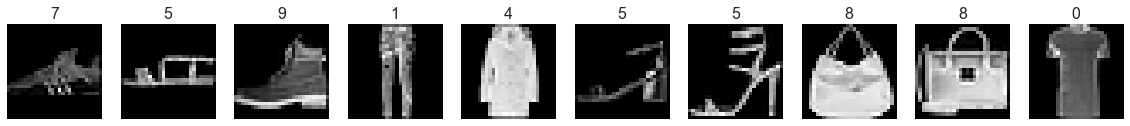

In [6]:
images, labels = get_samples(10, X_train, y_train)
plot_images(images, labels)

<h1> Reshape Function </h1>

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class preparation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X, y= None):
        return self
    def transform(self, X):
        X= X.reshape(X.shape[0], X.shape[1] * X.shape[2])/255
        return X

<h1> Random Forest </h1>

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
forest_pipe= Pipeline([('preparation', preparation()),
                        ('tree', RandomForestClassifier(random_state=42, n_jobs=-1, verbose=3, n_estimators=780, max_features= 'sqrt', bootstrap= 'False'))])

In [10]:
forest_pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 780
building tree 2 of 780
building tree 3 of 780
building tree 4 of 780
building tree 5 of 780
building tree 6 of 780
building tree 7 of 780
building tree 8 of 780
building tree 9 of 780
building tree 10 of 780
building tree 11 of 780
building tree 12 of 780
building tree 13 of 780
building tree 14 of 780
building tree 15 of 780
building tree 16 of 780
building tree 17 of 780
building tree 18 of 780
building tree 19 of 780
building tree 20 of 780
building tree 21 of 780
building tree 22 of 780
building tree 23 of 780
building tree 24 of 780


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s


building tree 25 of 780
building tree 26 of 780
building tree 27 of 780
building tree 28 of 780
building tree 29 of 780
building tree 30 of 780
building tree 31 of 780
building tree 32 of 780
building tree 33 of 780
building tree 34 of 780
building tree 35 of 780
building tree 36 of 780
building tree 37 of 780
building tree 38 of 780
building tree 39 of 780
building tree 40 of 780
building tree 41 of 780
building tree 42 of 780
building tree 43 of 780
building tree 44 of 780
building tree 45 of 780
building tree 46 of 780
building tree 47 of 780
building tree 48 of 780
building tree 49 of 780
building tree 50 of 780
building tree 51 of 780
building tree 52 of 780
building tree 53 of 780
building tree 54 of 780
building tree 55 of 780
building tree 56 of 780
building tree 57 of 780
building tree 58 of 780
building tree 59 of 780
building tree 60 of 780
building tree 61 of 780
building tree 62 of 780
building tree 63 of 780
building tree 64 of 780
building tree 65 of 780
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.4s


building tree 120 of 780
building tree 121 of 780
building tree 122 of 780
building tree 123 of 780
building tree 124 of 780
building tree 125 of 780
building tree 126 of 780
building tree 127 of 780
building tree 128 of 780
building tree 129 of 780
building tree 130 of 780
building tree 131 of 780
building tree 132 of 780
building tree 133 of 780
building tree 134 of 780
building tree 135 of 780
building tree 136 of 780
building tree 137 of 780
building tree 138 of 780
building tree 139 of 780
building tree 140 of 780
building tree 141 of 780
building tree 142 of 780
building tree 143 of 780
building tree 144 of 780
building tree 145 of 780
building tree 146 of 780
building tree 147 of 780
building tree 148 of 780
building tree 149 of 780
building tree 150 of 780
building tree 151 of 780
building tree 152 of 780
building tree 153 of 780
building tree 154 of 780
building tree 155 of 780
building tree 156 of 780
building tree 157 of 780
building tree 158 of 780
building tree 159 of 780


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   51.8s


building tree 282 of 780
building tree 283 of 780
building tree 284 of 780
building tree 285 of 780
building tree 286 of 780
building tree 287 of 780
building tree 288 of 780
building tree 289 of 780
building tree 290 of 780
building tree 291 of 780
building tree 292 of 780
building tree 293 of 780
building tree 294 of 780
building tree 295 of 780
building tree 296 of 780
building tree 297 of 780
building tree 298 of 780
building tree 299 of 780
building tree 300 of 780
building tree 301 of 780
building tree 302 of 780
building tree 303 of 780
building tree 304 of 780
building tree 305 of 780
building tree 306 of 780
building tree 307 of 780
building tree 308 of 780
building tree 309 of 780
building tree 310 of 780
building tree 311 of 780
building tree 312 of 780
building tree 313 of 780
building tree 314 of 780
building tree 315 of 780
building tree 316 of 780
building tree 317 of 780
building tree 318 of 780
building tree 319 of 780
building tree 320 of 780
building tree 321 of 780


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.5min


building tree 505 of 780
building tree 506 of 780
building tree 507 of 780
building tree 508 of 780
building tree 509 of 780
building tree 510 of 780
building tree 511 of 780
building tree 512 of 780
building tree 513 of 780
building tree 514 of 780
building tree 515 of 780
building tree 516 of 780
building tree 517 of 780
building tree 518 of 780
building tree 519 of 780
building tree 520 of 780
building tree 521 of 780
building tree 522 of 780
building tree 523 of 780
building tree 524 of 780
building tree 525 of 780
building tree 526 of 780
building tree 527 of 780
building tree 528 of 780
building tree 529 of 780
building tree 530 of 780
building tree 531 of 780
building tree 532 of 780
building tree 533 of 780
building tree 534 of 780
building tree 535 of 780
building tree 536 of 780
building tree 537 of 780
building tree 538 of 780
building tree 539 of 780
building tree 540 of 780
building tree 541 of 780
building tree 542 of 780
building tree 543 of 780
building tree 544 of 780


[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:  2.4min finished


Pipeline(steps=[('preparation', preparation()),
                ('tree',
                 RandomForestClassifier(bootstrap='False', max_features='sqrt',
                                        n_estimators=780, n_jobs=-1,
                                        random_state=42, verbose=3))])

In [11]:
forest_prediction= forest_pipe.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 780 out of 780 | elapsed:    1.0s finished


In [12]:
print(accuracy_score(forest_prediction, y_test)*100)

87.94


In [13]:
print(confusion_matrix(forest_prediction, y_test)*100)

[[86700   300  1200  1700   100     0 15000     0     0     0]
 [    0 96200     0   200     0     0   100     0   200     0]
 [ 1100   300 79900   700  8900     0 12100     0   300     0]
 [ 2900  2200   900 91000  3400   100  2700     0   200     0]
 [  300   300 11400  3000 82600     0  8300     0   500     0]
 [  100     0     0     0     0 96000     0  1100   200   800]
 [ 7700   500  6100  3200  4800     0 59900     0   800   100]
 [    0     0     0     0     0  2800     0 95300   500  4400]
 [ 1200   200   500   200   200   100  1900     0 97300   200]
 [    0     0     0     0     0  1000     0  3600     0 94500]]


In [14]:
print(classification_report(forest_prediction, y_test)*100)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1050
           1       0.96      0.99      0.98       967
           2       0.80      0.77      0.79      1033
           3       0.91      0.88      0.89      1034
           4       0.83      0.78      0.80      1064
           5       0.96      0.98      0.97       982
           6       0.60      0.72      0.65       831
           7       0.95      0.93      0.94      1030
           8       0.97      0.96      0.96      1018
           9       0.94      0.95      0.95       991

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1050
           1       0.96      0.99      0.98       967
           2       0.80      0.77      0.79      1033
           3       0.91  

In [41]:
forest_scores = cross_val_score(forest_pipe, X_train, y_train, scoring = 'accuracy', cv=10,  n_jobs=-1)
forest_scores

array([0.88783333, 0.88916667, 0.87616667, 0.88666667, 0.889     ,
       0.89016667, 0.89366667, 0.88583333, 0.8885    , 0.88216667])

In [15]:
import pickle

pickle.dump(forest_pipe, open('forest_pipe.pkl', 'wb'))

<h1> XGBoost </h1>

In [16]:
from xgboost import XGBClassifier 
from sklearn.pipeline import make_pipeline

In [17]:
XGB_pipe = make_pipeline(preparation(),XGBClassifier(eval_metric="rmse",verbosity=2, random_state=42))

In [22]:
XGB_pipe.fit(X_train, y_train)

[20:11:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[20:11:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[20:11:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[20:12:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[20:12:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[20:12:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 96 extra nodes

Pipeline(steps=[('preparation', preparation()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='rmse', gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity

In [24]:
XGB_predict= XGB_pipe.predict(X_test)

In [27]:
print(accuracy_score(XGB_predict, y_test)*100)

89.83


In [28]:
print(confusion_matrix(XGB_predict, y_test)*100)

[[86900   200  1500  2100   100     0 12100     0   100     0]
 [    0 97500   100   400     0     0   200     0   100     0]
 [ 1300   100 83000   900  7600     0  9300     0   500     0]
 [ 2300  1300   600 91400  3000     0  2200     0   200     0]
 [  500   400  8000  2300 83800     0  7000     0   300     0]
 [    0     0     0     0     0 96600     0   400   100   400]
 [ 8400   400  6500  2700  5500   100 68100     0   700     0]
 [    0     0     0     0     0  2100     0 96900   400  3100]
 [  600   100   300   200     0   100  1100     0 97600     0]
 [    0     0     0     0     0  1100     0  2700     0 96500]]


In [29]:
print(classification_report(XGB_predict, y_test)*100)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1030
           1       0.97      0.99      0.98       983
           2       0.83      0.81      0.82      1027
           3       0.91      0.90      0.91      1010
           4       0.84      0.82      0.83      1023
           5       0.97      0.99      0.98       975
           6       0.68      0.74      0.71       924
           7       0.97      0.95      0.96      1025
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1003

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1030
           1       0.97      0.99      0.98       983
           2       0.83      0.81      0.82      1027
           3       0.91  

In [40]:
XGB_scores = cross_val_score(XGB_pipe, X_train, y_train, scoring = 'accuracy', cv=10,  n_jobs=-1)
XGB_scores

array([0.90033333, 0.90766667, 0.89833333, 0.90433333, 0.90483333,
       0.9025    , 0.90433333, 0.90416667, 0.90233333, 0.90016667])

In [18]:
import pickle

pickle.dump(XGB_pipe, open('XGB_pipe.pkl', 'wb'))

<h1> SVM </h1>

In [8]:
from sklearn.svm import SVC

In [9]:
svm_pipe = make_pipeline(preparation(), SVC(gamma= 'scale', kernel='rbf', C=10, verbose=2))

In [33]:
svm_pipe.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('preparation', preparation()), ('svc', SVC(C=10, verbose=2))])

In [34]:
svm_predict= svm_pipe.predict(X_test)

In [38]:
print(accuracy_score(svm_predict, y_test)*100)

90.02


In [36]:
print(confusion_matrix(svm_predict, y_test)*100)

[[85300   300  2000  2400     0     0 11400     0   300     0]
 [    0 97300   300   200   100     0   100     0     0     0]
 [ 1300   200 83600  1300  8200     0  8200     0   300     0]
 [ 2100  1700   900 91000  2100   100  2400     0   300     0]
 [  600   300  7400  2700 83500     0  5400     0   300     0]
 [  100     0     0     0     0 97400     0  1600   200   800]
 [10000   200  5600  1900  6000     0 71800     0   300   100]
 [    0     0     0     0     0  1700     0 96200   300  3000]
 [  600     0   200   500   100   100   700     0 98000     0]
 [    0     0     0     0     0   700     0  2200     0 96100]]


In [37]:
print(classification_report(svm_predict, y_test)*100)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1017
           1       0.97      0.99      0.98       980
           2       0.84      0.81      0.82      1031
           3       0.91      0.90      0.91      1006
           4       0.83      0.83      0.83      1002
           5       0.97      0.97      0.97      1001
           6       0.72      0.75      0.73       959
           7       0.96      0.95      0.96      1012
           8       0.98      0.98      0.98      1002
           9       0.96      0.97      0.97       990

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1017
           1       0.97      0.99      0.98       980
           2       0.84      0.81      0.82      1031
           3       0.91  

In [10]:
svm_scores = cross_val_score(svm_pipe, X_train, y_train, scoring = 'accuracy', cv=10,  n_jobs=-1)
svm_scores

array([0.90483333, 0.912     , 0.89983333, 0.907     , 0.90483333,
       0.90483333, 0.91066667, 0.90783333, 0.90866667, 0.899     ])

In [19]:
import pickle

pickle.dump(svm_pipe, open('svm_pipe.pkl', 'wb'))